# 토픽모델링 분석 : 주제 'Metaverse'

# 정보융합학부 2021204051 우지윤

## 1) 필요한 패키지, 라이브러리.. 불러오기

In [3]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords

from gensim.models.coherencemodel import CoherenceModel
from konlpy.tag import Okt

import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from collections import defaultdict
from nltk.tokenize import word_tokenize 

## 2) 사용할 Data

In [4]:
data = pd.read_excel('metaverse_data1.xlsx')
data

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Lee, CW",NaN,NaN,NaN,"Lee, Chang Won",NaN,NaN,Application of Metaverse Service to Healthcare...,INTERNATIONAL JOURNAL OF ENVIRONMENTAL RESEARC...,...,NaN,NaN,NaN,36293609.0,NaN,NaN,NaN,NaN,WOS:000873101900001,View Full Record in Web of Science
1,C,"Nguyen, CT; Hoang, DT; Nguyen, DN; Dutkiewicz, E",NaN,NaN,IEEE,"Nguyen, Cong T.; Hoang, Dinh Thai; Nguyen, Die...",NaN,NaN,MetaChain: A Novel Blockchain-based Framework ...,2022 IEEE 95TH VEHICULAR TECHNOLOGY CONFERENCE...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000861825803029,View Full Record in Web of Science
2,C,"Mozumder, MAI; Sheeraz, MM; Athar, A; Aich, S;...",NaN,NaN,IEEE,"Mozumder, Md Ariful Islam; Sheeraz, Muhammad M...",NaN,NaN,Overview: Technology Roadmap of the Future Tre...,2022 24TH INTERNATIONAL CONFERENCE ON ADVANCED...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000835722000093,View Full Record in Web of Science
3,J,"Dahan, NA; Al-Razgan, M; Al-Laith, A; Alsoufi,...",NaN,NaN,NaN,"Dahan, Neama A.; Al-Razgan, Muna; Al-Laith, Al...",NaN,NaN,Metaverse Framework: A Case Study on E-Learnin...,ELECTRONICS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000802478800001,View Full Record in Web of Science
4,C,"Njoku, JN; Nwakanma, CI; Kim, DS",NaN,NaN,IEEE,"Njoku, Judith Nkechinyere; Nwakanma, Cosmas If...",NaN,NaN,The Role of 5G Wireless Communication System i...,2022 27TH ASIA PACIFIC CONFERENCE ON COMMUNICA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000918854200060,View Full Record in Web of Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,C,"Abrash, M",NaN,NaN,IEEE,"Abrash, Michael",NaN,NaN,"Creating the Future: Augmented Reality, the ne...",2021 IEEE INTERNATIONAL ELECTRON DEVICES MEETI...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000812325400032,View Full Record in Web of Science
516,J,"Chen, YL; Wang, XZ; Liu, Z; Cui, J; Osmani, M;...",NaN,NaN,NaN,"Chen, Yali; Wang, Xiaozi; Liu, Zhen; Cui, Jia;...",NaN,NaN,Exploring Building Information Modeling (BIM) ...,BUILDINGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000938357000001,View Full Record in Web of Science
517,J,"Zempo, K; Yamazaki, A; Wakatsuki, N; Mizutani,...",NaN,NaN,NaN,"Zempo, Keiichi; Yamazaki, Azusa; Wakatsuki, Na...",NaN,NaN,Mouth-in-the-Door: The Effect of a Sound Image...,IEEE ACCESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000894939100001,View Full Record in Web of Science
518,J,"Shah, SHH; Karlsen, AST; Solberg, M; Hameed, IA",NaN,NaN,NaN,"Shah, Syed Hammad Hussain; Karlsen, Anniken Su...",NaN,NaN,A social VR-based collaborative exergame for r...,VIRTUAL REALITY,...,NaN,NaN,NaN,36465891.0,NaN,NaN,NaN,NaN,WOS:000889046500001,View Full Record in Web of Science


## 3) 전처리 과정

### 3-1) 주요 Column 뽑아내기

In [5]:
data = data[['Authors','Article Title', 'Abstract','Publication Year']]
data

,Authors,Article Title,Abstract,Publication Year
0,"Lee, CW",Application of Metaverse Service to Healthcare...,This study is to explore a state of the art in...,2022.0
1,"Nguyen, CT; Hoang, DT; Nguyen, DN; Dutkiewicz, E",MetaChain: A Novel Blockchain-based Framework ...,Metaverse has recently attracted paramount att...,2022.0
2,"Mozumder, MAI; Sheeraz, MM; Athar, A; Aich, S;...",Overview: Technology Roadmap of the Future Tre...,Metaverse is defined as a collection of techno...,2022.0
3,"Dahan, NA; Al-Razgan, M; Al-Laith, A; Alsoufi,...",Metaverse Framework: A Case Study on E-Learnin...,Metaverse is a vast term that can contain ever...,2022.0
4,"Njoku, JN; Nwakanma, CI; Kim, DS",The Role of 5G Wireless Communication System i...,The metaverse is a virtual world that is based...,2022.0
...,...,...,...,...
515,"Abrash, M","Creating the Future: Augmented Reality, the ne...","XR, consisting of Virtual Reality (VR) and Aug...",2021.0
516,"Chen, YL; Wang, XZ; Liu, Z; Cui, J; Osmani, M;...",Exploring Building Information Modeling (BIM) ...,"Sustainable development, which has become the ...",2023.0
517,"Zempo, K; Yamazaki, A; Wakatsuki, N; Mizutani,...",Mouth-in-the-Door: The Effect of a Sound Image...,"In this paper, we examine the audiovisual expe...",2022.0
518,"Shah, SHH; Karlsen, AST; Solberg, M; Hameed, IA",A social VR-based collaborative exergame for r...,Immersive virtual reality (VR)-based exercise ...,NaN


### 3-2) 결측치 확인

In [6]:
data.isna().sum()

Authors              0
Article Title        0
Abstract            33
Publication Year    66
dtype: int64

In [7]:
data.shape

(520, 4)

null값 존재 확인. 어떻게 처리해야할까?
- 널 값 처리 전 (520,4) shape
- abstract가 null값인 경우는 사용할 수 없기에 제거해야한다
- 연도별 토픽 모델링 분석도 생각 중이기에
- 각 행의 초록과 연도 데이터에 null값이 있으면 제거하겠다.

### 3-3) 결측치 제거

In [8]:
data = data.dropna()
data

,Authors,Article Title,Abstract,Publication Year
0,"Lee, CW",Application of Metaverse Service to Healthcare...,This study is to explore a state of the art in...,2022.0
1,"Nguyen, CT; Hoang, DT; Nguyen, DN; Dutkiewicz, E",MetaChain: A Novel Blockchain-based Framework ...,Metaverse has recently attracted paramount att...,2022.0
2,"Mozumder, MAI; Sheeraz, MM; Athar, A; Aich, S;...",Overview: Technology Roadmap of the Future Tre...,Metaverse is defined as a collection of techno...,2022.0
3,"Dahan, NA; Al-Razgan, M; Al-Laith, A; Alsoufi,...",Metaverse Framework: A Case Study on E-Learnin...,Metaverse is a vast term that can contain ever...,2022.0
4,"Njoku, JN; Nwakanma, CI; Kim, DS",The Role of 5G Wireless Communication System i...,The metaverse is a virtual world that is based...,2022.0
...,...,...,...,...
514,"Kim, C; Cha, HS; Kim, J; Kwak, H; Lee, W; Im, CH",Facial Motion Capture System Based on Facial E...,With the rapid development of virtual reality ...,2023.0
515,"Abrash, M","Creating the Future: Augmented Reality, the ne...","XR, consisting of Virtual Reality (VR) and Aug...",2021.0
516,"Chen, YL; Wang, XZ; Liu, Z; Cui, J; Osmani, M;...",Exploring Building Information Modeling (BIM) ...,"Sustainable development, which has become the ...",2023.0
517,"Zempo, K; Yamazaki, A; Wakatsuki, N; Mizutani,...",Mouth-in-the-Door: The Effect of a Sound Image...,"In this paper, we examine the audiovisual expe...",2022.0


In [9]:
data.shape

(425, 4)

결측치 처리후 shape (425,4)
- 이 데이터로 진행하겠다!

## 4) LDA 토픽 모델링 진행

## 중요! 최적의 토픽 수 선택

In [21]:
texts = data['Abstract'].tolist()

# 텍스트 토큰화 <- Okt tokenizer
tokenizer = Okt()
texts = [tokenizer.morphs(text) for text in texts]

# 토큰화된 텍스트로 사전 구축
dictionary = corpora.Dictionary(texts)

# BoW 코퍼스 구출
corpus = [dictionary.doc2bow(text) for text in texts]

# 토픽 최적의 수 구하기
start_topic = 2
end_topic = 10
step = 1
coherence_scores = []
for num_topics in range(start_topic, end_topic+1, step):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"Topic의 개수: {num_topics}, Coherence Score: {coherence_score}")

optimal_num_topics = coherence_scores.index(max(coherence_scores)) + start_topic
print(f"최적의 토픽 개수: {optimal_num_topics}")

Topic의 개수: 2, Coherence Score: 0.27002192074108977
Topic의 개수: 3, Coherence Score: 0.2686846436263535
Topic의 개수: 4, Coherence Score: 0.27171008241081696
Topic의 개수: 5, Coherence Score: 0.27585311712728416
Topic의 개수: 6, Coherence Score: 0.27257710035215793
Topic의 개수: 7, Coherence Score: 0.26714099924590723
Topic의 개수: 8, Coherence Score: 0.2671342576182112
Topic의 개수: 9, Coherence Score: 0.27050753967249197
Topic의 개수: 10, Coherence Score: 0.2720395659640552
최적의 토픽 개수: 5


- 일관성 점수가 높은 모델은 주제 간의 일관성이 높아 의미 있는 토픽을 잘 나타내는 경향이 있습니다. 
- 따라서 이를 기준으로 최적의 토픽 수를 선택할 수 있습니다. 
=> 토픽의 수 5개

# 1. LDA 모델 생성, 5개 Topic

In [22]:
texts = data['Abstract'].dropna().tolist()

# 텍스트 정제 : 불용어 제거
# 불필요한 단어 제거(영어)
stop_words = stopwords.words('english')
texts = [[word for word in str(text).lower().split() if word not in stop_words] for text in texts]

# 각 문서를 단어 리스트로 변환
texts = [[word for word in str(text).split()] for text in texts]

# 사전(dictionary) 구축
dictionary = corpora.Dictionary(texts)

# 문서-단어 행렬(corpus) 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
lda_model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5)

# 결과 출력
for topic in lda_model.print_topics():
    print(topic)

(0, '0.016*"\'metaverse\'," + 0.007*"\'virtual\'," + 0.004*"\'based\'," + 0.004*"\'model\'," + 0.004*"\'research\'," + 0.004*"\'technology\'," + 0.003*"\'new\'," + 0.003*"\'social\'," + 0.003*"\'digital\'," + 0.003*"\'results\',"')
(1, '0.006*"\'metaverse\'," + 0.006*"\'virtual\'," + 0.004*"\'reality\'," + 0.004*"\'based\'," + 0.003*"\'digital\'," + 0.003*"\'research\'," + 0.003*"\'vr\'," + 0.003*"\'using\'," + 0.003*"\'also\'," + 0.003*"\'new\',"')
(2, '0.012*"\'metaverse\'," + 0.010*"\'virtual\'," + 0.006*"\'digital\'," + 0.004*"\'reality\'," + 0.004*"\'research\'," + 0.004*"\'new\'," + 0.003*"\'data\'," + 0.003*"\'users\'," + 0.003*"\'technologies\'," + 0.003*"\'using\',"')
(3, '0.011*"\'metaverse\'," + 0.005*"\'research\'," + 0.005*"\'virtual\'," + 0.004*"\'digital\'," + 0.004*"\'reality\'," + 0.004*"\'using\'," + 0.003*"\'learning\'," + 0.003*"\'3d\'," + 0.003*"\'future\'," + 0.003*"\'real\',"')
(4, '0.011*"\'virtual\'," + 0.007*"\'metaverse\'," + 0.005*"\'using\'," + 0.004*"\'rea

- 주제 도출   
1) 디지털 모델의 기술에 기초한 가상의 메타버스에 관한 연구 결과   
2) 디지털이나 vr을 기반으로 하는 새로운 가상현실 메타버스에 관한 조사 결과   
3) 가상현실 메타버스를 사용하는 사용자들의 데이터에 관한 새로운 디지털 기술 조사 결과   
4) 디지털과 3d를 활용하여 가상현실 메타버스에 대한 연구를 통해 현실과 미래를 배우는 결과   
5) 가상현실 메타버스를 기반으로 한 새로운 디지털 디자인을 활용한 연구 결과   

ChatGPT와 주제 비교 위해서 ChatGPT 프롬프트에 “메타버스 분야와 관련된 주요 토픽 5개를 알려줘”입력

- ChatGPT가 제공한 주요 토픽 5가지 :‘가상현실(VR)’, ‘증강현실(AR)’, ‘가상경험 경제’, ‘가상 소셜 네트워킹’, ‘가상현실 교육’

# 2. LDA - Topic 5개별 상위 5개 단어 추출, 토픽별 단어 빈도 그래프

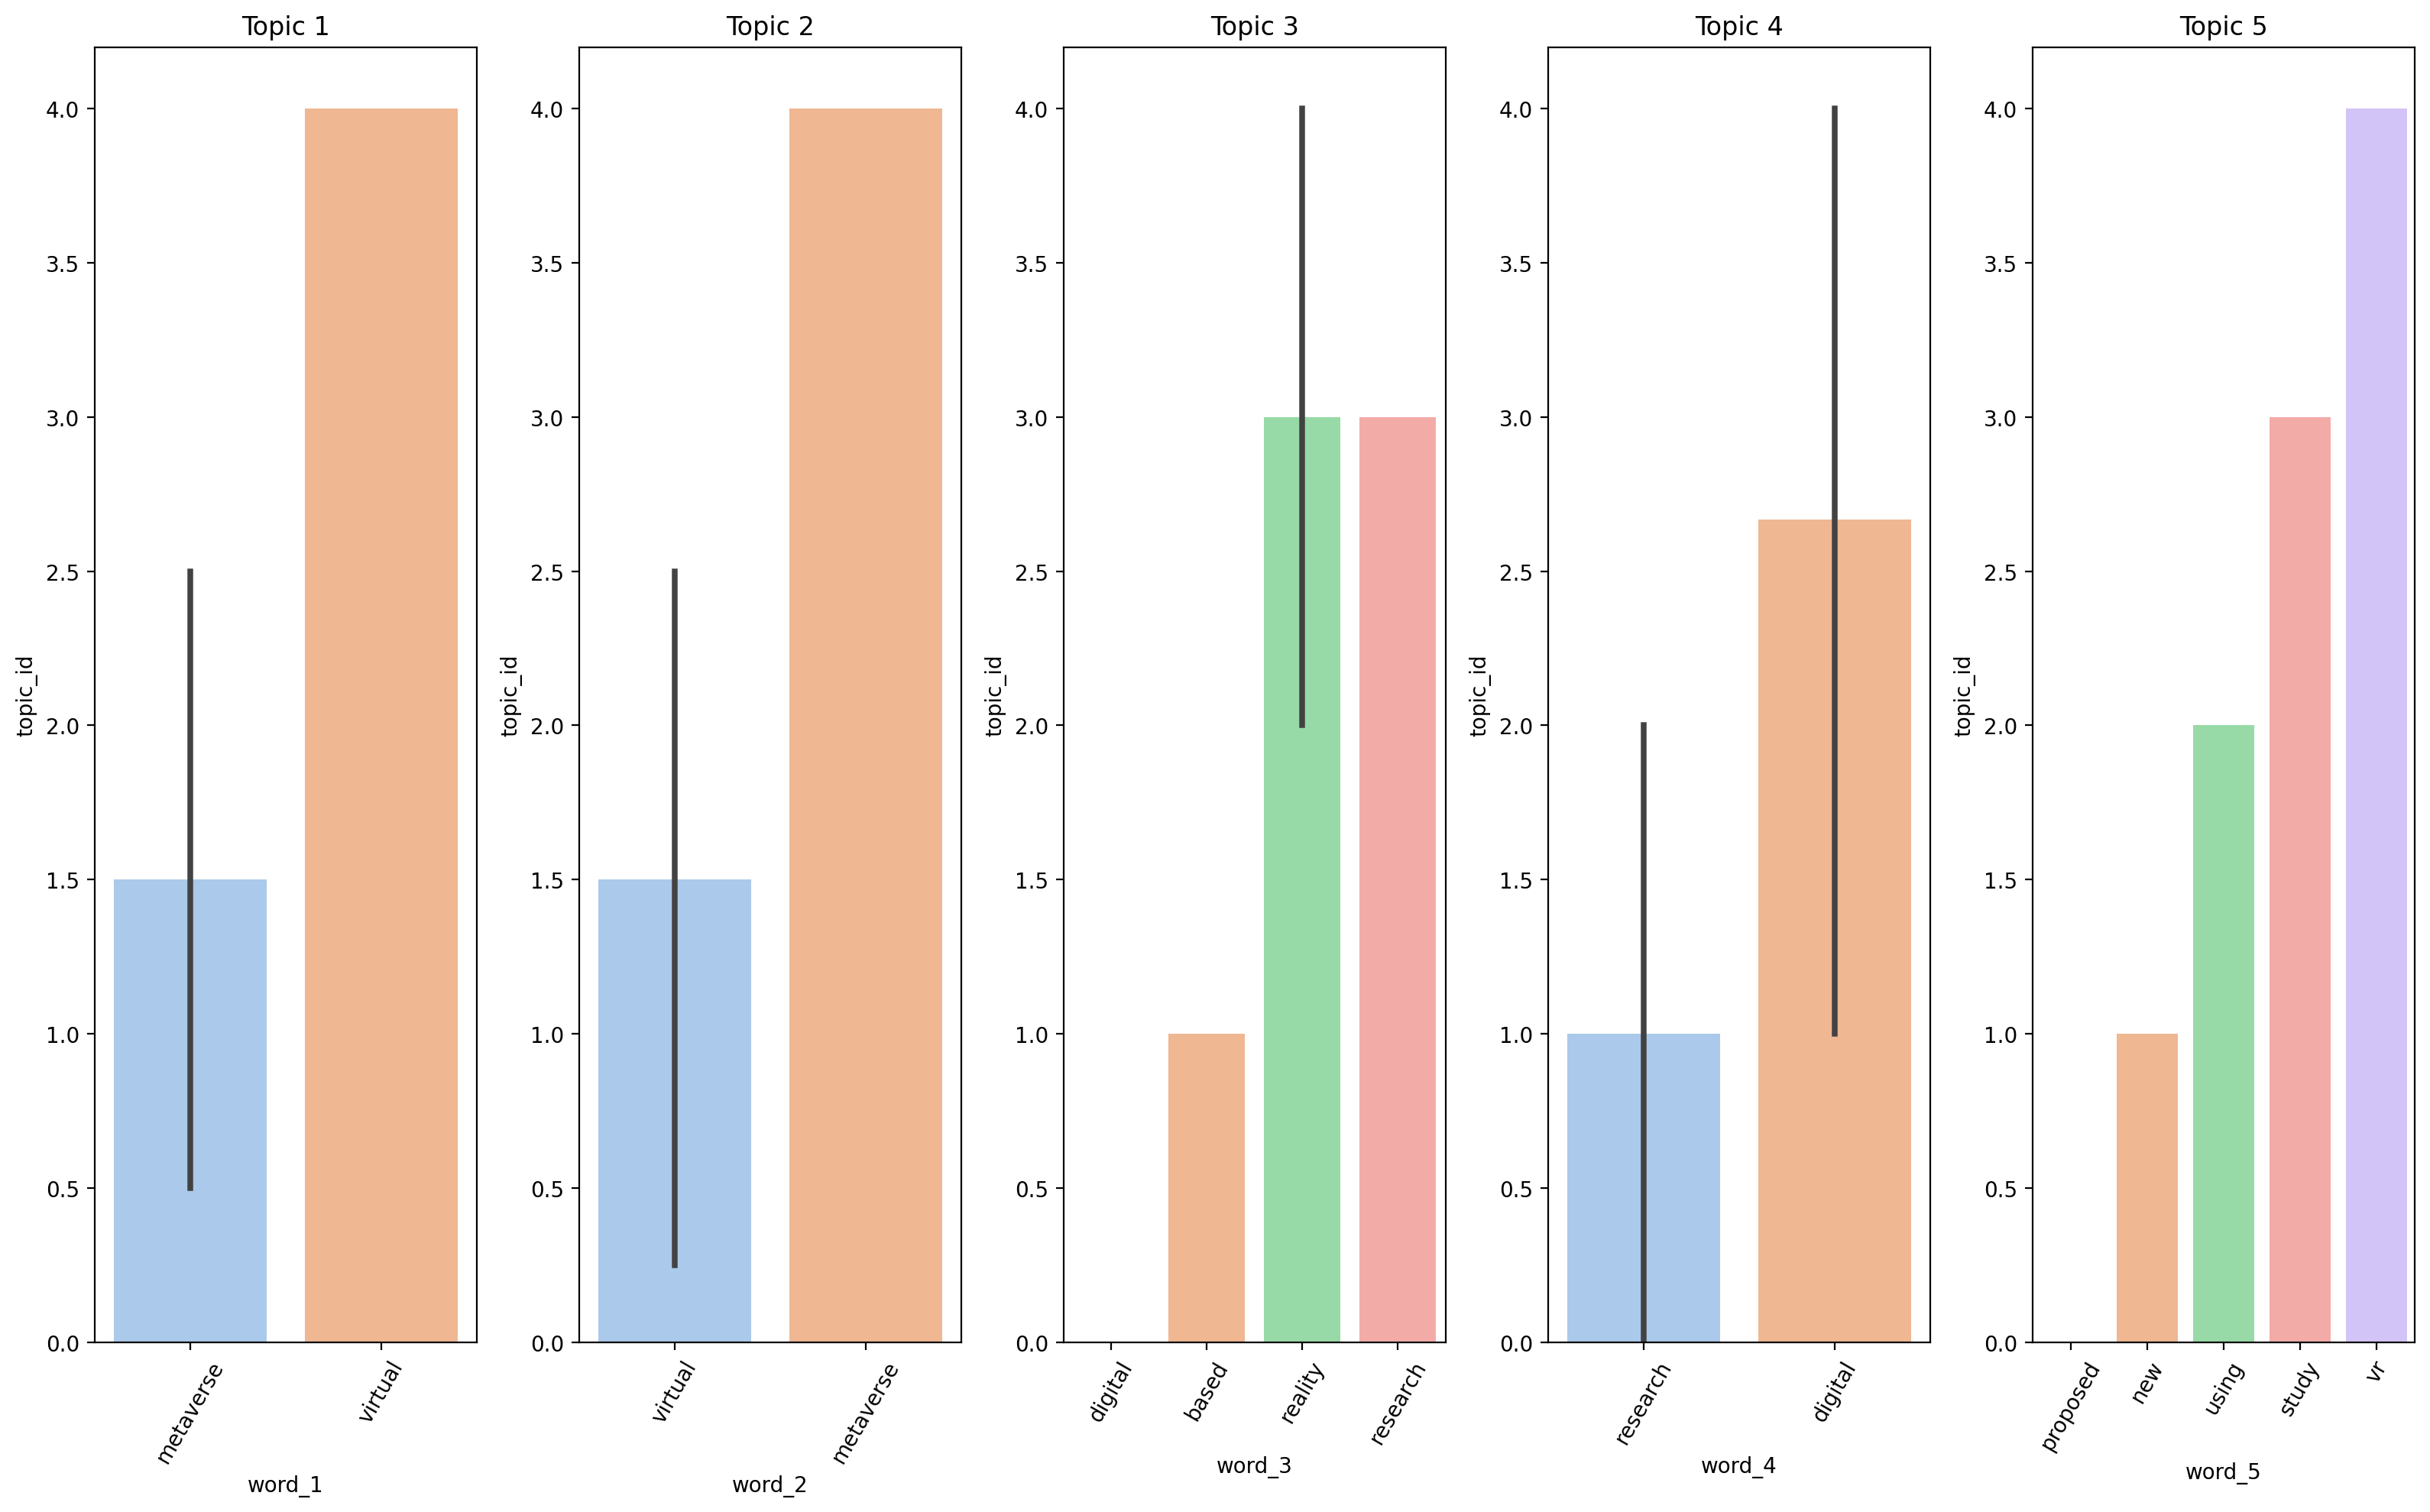

In [25]:
texts = data['Abstract'].dropna().tolist()


# 텍스트 정제 : 불용어 제거
# 불필요한 단어 제거(영어)
stop_words = stopwords.words('english')
texts = [[word for word in str(text).lower().split() if word not in stop_words] for text in texts]

# 사전(dictionary) 구축
dictionary = corpora.Dictionary(texts)

# 문서-단어 행렬(corpus) 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
lda_model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5)

# 토픽 별 상위 단어 추출
topic_word = []
for i, topic in lda_model.show_topics(formatted = False, num_words = 5):
    topic_word.append([i] + [word[0] for word in topic])
    
# 데이터프레임으로 변환
topic_word_df = pd.DataFrame(topic_word, columns=['topic_id', 'word_1', 'word_2', 'word_3', 'word_4', 'word_5'])


# 1) 토픽별 단어 빈도 그래프 생성
plt.figure(figsize = (16,10), dpi=200)
for i in range(1, lda_model.num_topics + 1):
    plt.subplot(1, 5, i)
    sns.barplot(x = 'word_' + str(i), y = 'topic_id', data = topic_word_df, palette = 'pastel')
    plt.title('Topic ' + str(i))
    plt.xticks(rotation = 60)
plt.tight_layout()
plt.show()

# 3. LDA 모델링 결과 인터랙티브 시각화
- 우측 상단 sliding bar를 통해 Relevance를 조절
    - Relevance는 특정 토픽에서 어떤 단어의 출현 빈도와 전체 문서에서 그 단어의 출현 빈도를 균형 있게 조정하는 하이퍼 파라미터
    - 즉, 특정 토픽에서 출현 빈도가 높게 나타난 어떤 단어가 있을 때, 그 단어가 다른 토픽과 해당 토픽을 구분하는 키워드이기 때문에 출현 빈도가 높은 것인지, 아니면 단순히 여러 문서 데이터에서 널리 사용되는 단어이기 때문에 출현 빈도가 높았던 것인지 명확히 구분할 수 있도록 도와주는 파라미터입니다
    
- Relevance 값은 0부터 1 사이의 값, 0에 가까울수록 전체 문서에서 출현 횟수는 적더라도 해당 토픽을 다른 토픽과 차별성 있게 구분할 수 있는 단어인지에 집중
    - 반대로, Relevance 값이 1에 가까울수록 특정 토픽을 구성하는 키워드보다는 전체 문서 데이터에서 얼마나 빈출 되는 키워드일 가능성이 높다는 의미
    
- 좌측 원이 모두 각각의 토픽 (5개)
    - 서로 가까이 붙어있는 원일 수록 유사한 토픽입니다. 원이 클수록 토픽에 해당되는 단어(=토큰)의 개수가 많다
    - 원에 마우스를 가져다 대면 우측에 해당 토픽을 구성하는 단어가 전체 문서 데이터 대비 현재 토픽의 키워드로 구성되었는지 비율을 알려줌
    - 또한, 전체 문서 데이터의 단어 대비 해당 토픽이 구성하는 단어들의 비율을 제공
        - 이처럼 토픽별로 어떤 단어들이, 어떤 비율로 구성되어 있는지 파악함으로써 토픽별 주제를 유추할 수 있으며, 나아가 전체 문서 데이터에 어떤 토픽이, 어떤 비율로(=중요도) 구성되어 있는지 파악 가능


In [14]:
texts = data['Abstract'].dropna().tolist()

texts = [[word for word in str(text).lower().split() if word not in stop_words] for text in texts]

texts = [[word for word in str(text).split()] for text in texts]

dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5)


vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# 4. 토픽별 단어 빈도 표

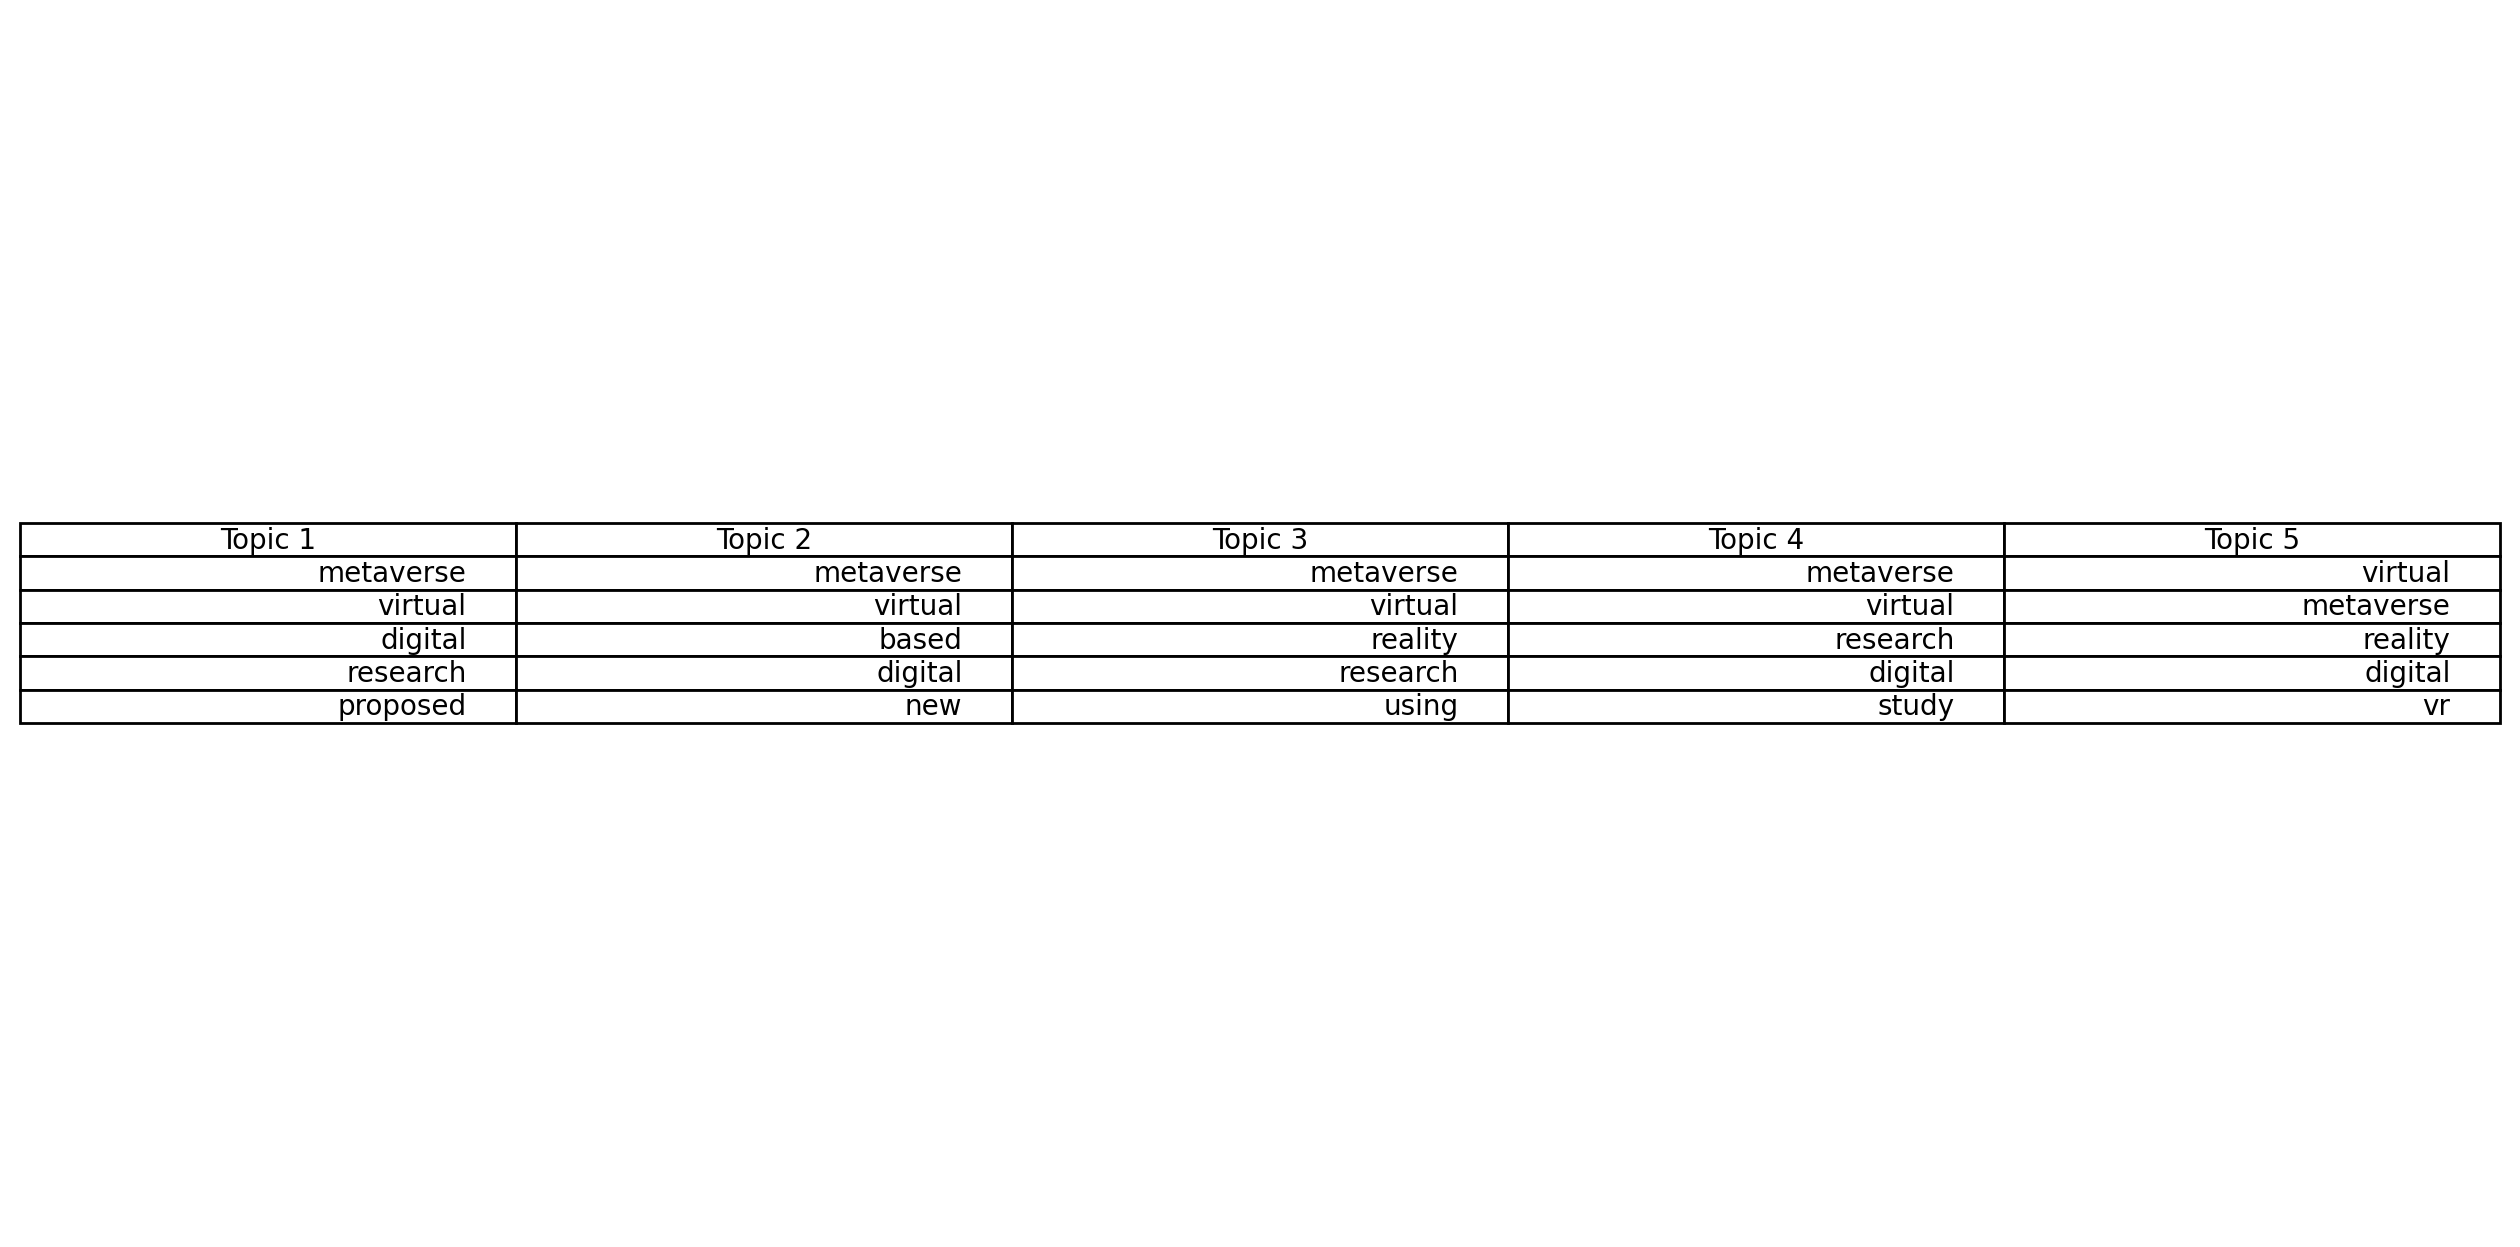

In [26]:
# 2) 토픽별 단어 빈도 표 생성

# Get the top 5 words for each topic
topics = lda_model.show_topics(num_topics = 5, num_words = 5, formatted = False)

# Create a dataframe to store the top words for each topic
df = pd.DataFrame()

# Iterate over the topics and add the top words to the dataframe
for topic in topics:
    topic_num = topic[0]
    words = [word[0] for word in topic[1]]
    df['Topic {}'.format(topic_num + 1)] = words

# Create a table using matplotlib
fig, ax = plt.subplots(figsize = (16,8), dpi=200)
ax.axis('off')
ax.table(cellText = df.values, colLabels = df.columns, loc = 'center')
plt.show()

- 첫번째 토픽 : '가상의 메타버스와 디지털에 제안된 조사'
- 두번째 토픽 : '가상의 메타버스와 디지털에 기반한 새로운 것'
- 세번째 토픽 : '메타버스의 가상현실을 사용한 조사'
- 네번째 토픽 : '가상의 메타버스와 디지털에 관한 조사와 연구'
- 다섯번째 토픽 : '가상현실 메타버스와 디지털과 vr'

# 5. 주요 토픽 추출, 각 주요 토픽 등장 횟수

In [27]:
# LDA 모델 생성
lda_model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5)

# 각 토픽에서 가장 많이 등장한 상위 5개의 단어 추출
top_n = 5
topic_words = {}
for i in range(lda_model.num_topics):
    topic_words[i] = [word for word, _ in lda_model.show_topic(i, topn = top_n)]

# 주요 토픽 추출
major_topic = {}
for i, text in enumerate(texts):
    topic_scores = sorted(lda_model[corpus[i]], key = lambda x: -x[1])
    major_topic[i] = topic_scores[0][0]  # 가장 높은 점수를 받은 토픽 번호
    
for topic, words in topic_words.items():
    count = 0
    for i, t in major_topic.items():
        if t == topic and set(words) & set(texts[i]):
            count += 1
    print(f"Topic {topic + 1}: {count}")

Topic 1: 55
Topic 2: 130
Topic 3: 67
Topic 4: 75
Topic 5: 64


# 6. 각 문서가 속하는 토픽

In [28]:
# 데이터 불러오기
df = pd.read_excel('metaverse_data1.xlsx')
texts = df['Abstract'].dropna().tolist()

# 텍스트 전처리
# 텍스트 정제 : 불용어 제거
# 불필요한 단어 제거(영어)
stop_words = stopwords.words('english')
texts = [[word for word in str(text).lower().split() if word not in stop_words] for text in texts]

# 문서-단어 행렬(corpus) 생성
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=5)

# 각 문서가 어떤 토픽에 속하는지 확인
for i, topic_list in enumerate(lda_model[corpus]):
    print(f"문서 {i}의 토픽 비율:", topic_list)


문서 0의 토픽 비율: [(0, 0.9918262)]
문서 1의 토픽 비율: [(2, 0.4024093), (4, 0.5920586)]
문서 2의 토픽 비율: [(2, 0.9895531)]
문서 3의 토픽 비율: [(0, 0.99189764)]
문서 4의 토픽 비율: [(2, 0.98302364)]
문서 5의 토픽 비율: [(4, 0.99453974)]
문서 6의 토픽 비율: [(2, 0.99094474)]
문서 7의 토픽 비율: [(2, 0.98732203)]
문서 8의 토픽 비율: [(2, 0.2227789), (4, 0.76716846)]
문서 9의 토픽 비율: [(2, 0.99247587)]
문서 10의 토픽 비율: [(2, 0.99397045)]
문서 11의 토픽 비율: [(2, 0.9961833)]
문서 12의 토픽 비율: [(2, 0.9887264)]
문서 13의 토픽 비율: [(2, 0.98229593)]
문서 14의 토픽 비율: [(0, 0.9936973)]
문서 15의 토픽 비율: [(2, 0.99188924)]
문서 16의 토픽 비율: [(2, 0.22240771), (3, 0.7727645)]
문서 17의 토픽 비율: [(2, 0.55165136), (4, 0.4399485)]
문서 18의 토픽 비율: [(2, 0.97192943)]
문서 19의 토픽 비율: [(3, 0.99289405)]
문서 20의 토픽 비율: [(2, 0.2595495), (4, 0.73071927)]
문서 21의 토픽 비율: [(3, 0.9907967)]
문서 22의 토픽 비율: [(2, 0.46632627), (3, 0.528354)]
문서 23의 토픽 비율: [(2, 0.99315596)]
문서 24의 토픽 비율: [(4, 0.9707125)]
문서 25의 토픽 비율: [(2, 0.98574346)]
문서 26의 토픽 비율: [(2, 0.9918201)]
문서 27의 토픽 비율: [(3, 0.98860425)]
문서 28의 토픽 비율: [(2, 0.9915381

문서 334의 토픽 비율: [(1, 0.9919667)]
문서 335의 토픽 비율: [(0, 0.99047756)]
문서 336의 토픽 비율: [(0, 0.98981804)]
문서 337의 토픽 비율: [(0, 0.9914035)]
문서 338의 토픽 비율: [(4, 0.9876967)]
문서 339의 토픽 비율: [(1, 0.9959407)]
문서 340의 토픽 비율: [(1, 0.9903775)]
문서 341의 토픽 비율: [(3, 0.99095815)]
문서 342의 토픽 비율: [(3, 0.99501693)]
문서 343의 토픽 비율: [(3, 0.9956738)]
문서 344의 토픽 비율: [(2, 0.98994577)]
문서 345의 토픽 비율: [(3, 0.99155664)]
문서 346의 토픽 비율: [(4, 0.99550027)]
문서 347의 토픽 비율: [(4, 0.9902582)]
문서 348의 토픽 비율: [(3, 0.8504435), (4, 0.14328928)]
문서 349의 토픽 비율: [(2, 0.9917635)]
문서 350의 토픽 비율: [(2, 0.30690178), (3, 0.68663615)]
문서 351의 토픽 비율: [(2, 0.9892548)]
문서 352의 토픽 비율: [(4, 0.99292964)]
문서 353의 토픽 비율: [(2, 0.9961685)]
문서 354의 토픽 비율: [(1, 0.989383)]
문서 355의 토픽 비율: [(2, 0.991683)]
문서 356의 토픽 비율: [(4, 0.9908226)]
문서 357의 토픽 비율: [(0, 0.9920521)]
문서 358의 토픽 비율: [(0, 0.9909974)]
문서 359의 토픽 비율: [(0, 0.9909974)]
문서 360의 토픽 비율: [(4, 0.99246013)]
문서 361의 토픽 비율: [(0, 0.9917221)]
문서 362의 토픽 비율: [(4, 0.99171144)]
문서 363의 토픽 비율: [(1, 0.9909131

# 추가) 연도별 토픽 분석, 토픽 어떻게 변화하나?
- 임의로 토픽 2개, 단어 3개 지정해서 진행!

# 1. 2021년

In [13]:
data2 = data[data['Publication Year']==2021]
data2

,Authors,Article Title,Abstract,Publication Year
20,"Han, YQ; Oh, S",Investigation and Research on the Negotiation ...,Combining the current era background of the ra...,2021.0
79,"Di Pietro, R; Cresci, S",Metaverse: Security and Privacy Issues,The metaverse promises a host of bright opport...,2021.0
140,"Hong, RM; He, H",Interference and Consultation in Virtual Publi...,Intermedia art is an art form that spans many ...,2021.0
208,"Yoon, K; Kim, SK; Jeong, SP; Choi, JH",Interfacing Cyber and Physical Worlds: Introdu...,The IEEE 2888 standard is in the process of de...,2021.0
243,"Siyaev, A; Jo, GS",Neuro-Symbolic Speech Understanding in Aircraf...,"In the emerging world of metaverses, it is ess...",2021.0
246,"Jot, JM; Audfray, R; Hertensteiner, M; Schmidt, B",Rendering Spatial Sound for Interoperable Expe...,Interactive audio spatialization technology pr...,2021.0
292,"Siyaev, A; Jo, GS",Towards Aircraft Maintenance Metaverse Using S...,Metaverses embedded in our lives create virtua...,2021.0
357,"Park, S; Min, K; Kim, S",Differences in Learning Motivation among Bartl...,Gamification is one of the methods used for de...,2021.0
378,"Jeong, JB; Lee, S; Ryu, ES",DWS-BEAM: Decoder-Wise Subpicture Bitstream Ex...,With the new immersive video coding standard M...,2021.0
381,"Lee, H; Jung, J",Clustering-Based Plane Segmentation Neural Net...,Urban scene modeling is a challenging but esse...,2021.0


## 2021년 - 토픽 2개, 단어 3개, 토픽별 단어 빈도 시각화

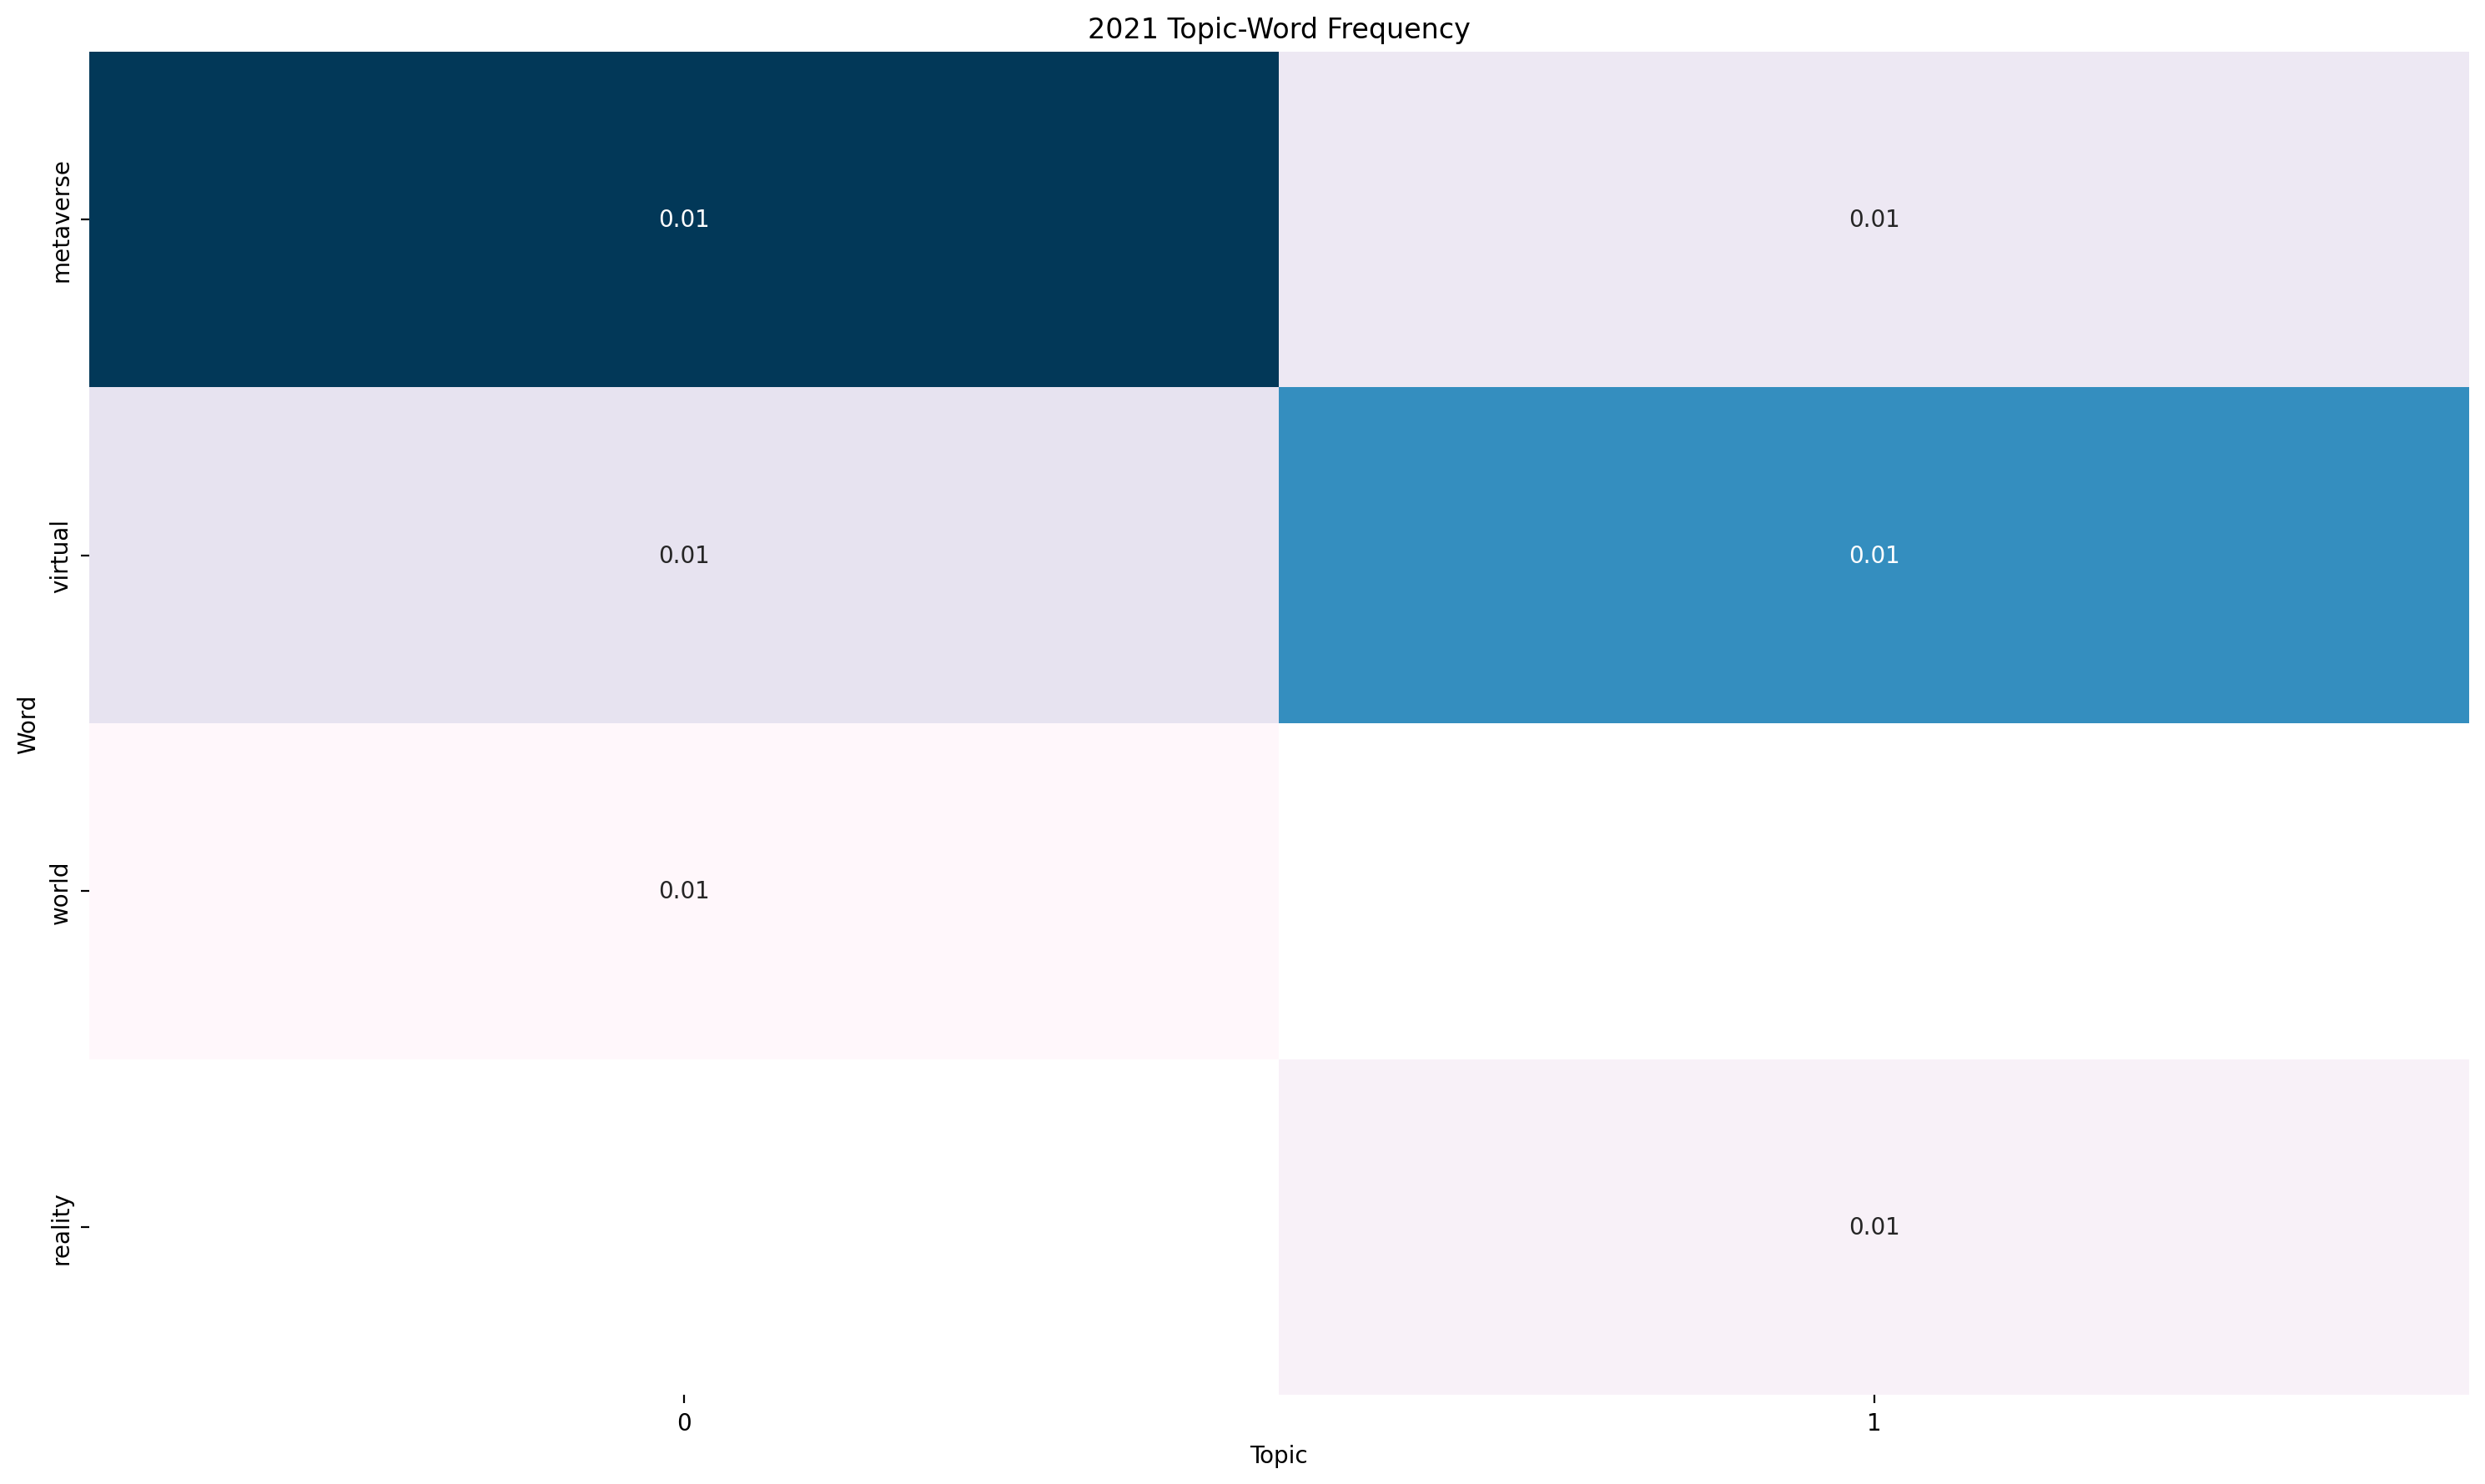

In [22]:
# 텍스트 전처리
stop_words = stopwords.words('english')
texts = data2['Abstract'].dropna().tolist()
texts = [[word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words] for text in texts]

# 사전(dictionary) 구축
dictionary = corpora.Dictionary(texts)

# 문서-단어 행렬(corpus) 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2)

# 토픽별 단어 빈도 표 생성
topic_word_freq = {}
for i in range(lda_model.num_topics):
    topic_word_freq[i] = dict(lda_model.show_topic(i, topn=3))

topic_word_df = pd.DataFrame(topic_word_freq)

# 토픽별 단어 빈도 시각화
plt.figure(figsize=(15, 9), dpi=200)
sns.heatmap(topic_word_df, cmap='PuBu', annot=True, fmt=".2f", cbar=False)
plt.xlabel('Topic')
plt.ylabel('Word')
plt.title('2021 Topic-Word Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 첫번째 토픽 : metaverse, virtual, world [메타버스,가상,세계] => '가상 세계 메타버스'
- 두번째 토픽 : metaverse, virtual, reality [메타버스,가상,현실] => ' 가상 현실 메타버스' 도출

# 2. 2022년

In [15]:
data3 = data[data['Publication Year']==2022]
data3

,Authors,Article Title,Abstract,Publication Year
0,"Lee, CW",Application of Metaverse Service to Healthcare...,This study is to explore a state of the art in...,2022.0
1,"Nguyen, CT; Hoang, DT; Nguyen, DN; Dutkiewicz, E",MetaChain: A Novel Blockchain-based Framework ...,Metaverse has recently attracted paramount att...,2022.0
2,"Mozumder, MAI; Sheeraz, MM; Athar, A; Aich, S;...",Overview: Technology Roadmap of the Future Tre...,Metaverse is defined as a collection of techno...,2022.0
3,"Dahan, NA; Al-Razgan, M; Al-Laith, A; Alsoufi,...",Metaverse Framework: A Case Study on E-Learnin...,Metaverse is a vast term that can contain ever...,2022.0
4,"Njoku, JN; Nwakanma, CI; Kim, DS",The Role of 5G Wireless Communication System i...,The metaverse is a virtual world that is based...,2022.0
...,...,...,...,...
511,"Liu, Z; Li, PX; Wang, FH; Osmani, M; Demian, P",Building Information Modeling (BIM) Driven Car...,Governments across the world are taking action...,2022.0
512,"Na, MH",Opportunities and Challenges of Emerging Memor...,"All over the world, our lives have forever cha...",2022.0
513,"Chen, HY; Lin, CS",Tiled streaming for layered 3D virtual reality...,"In recent years, the demand of 3D video servic...",2022.0
517,"Zempo, K; Yamazaki, A; Wakatsuki, N; Mizutani,...",Mouth-in-the-Door: The Effect of a Sound Image...,"In this paper, we examine the audiovisual expe...",2022.0


## 2022년 - 토픽 2개, 단어 3개, 토픽별 단어 빈도 시각화

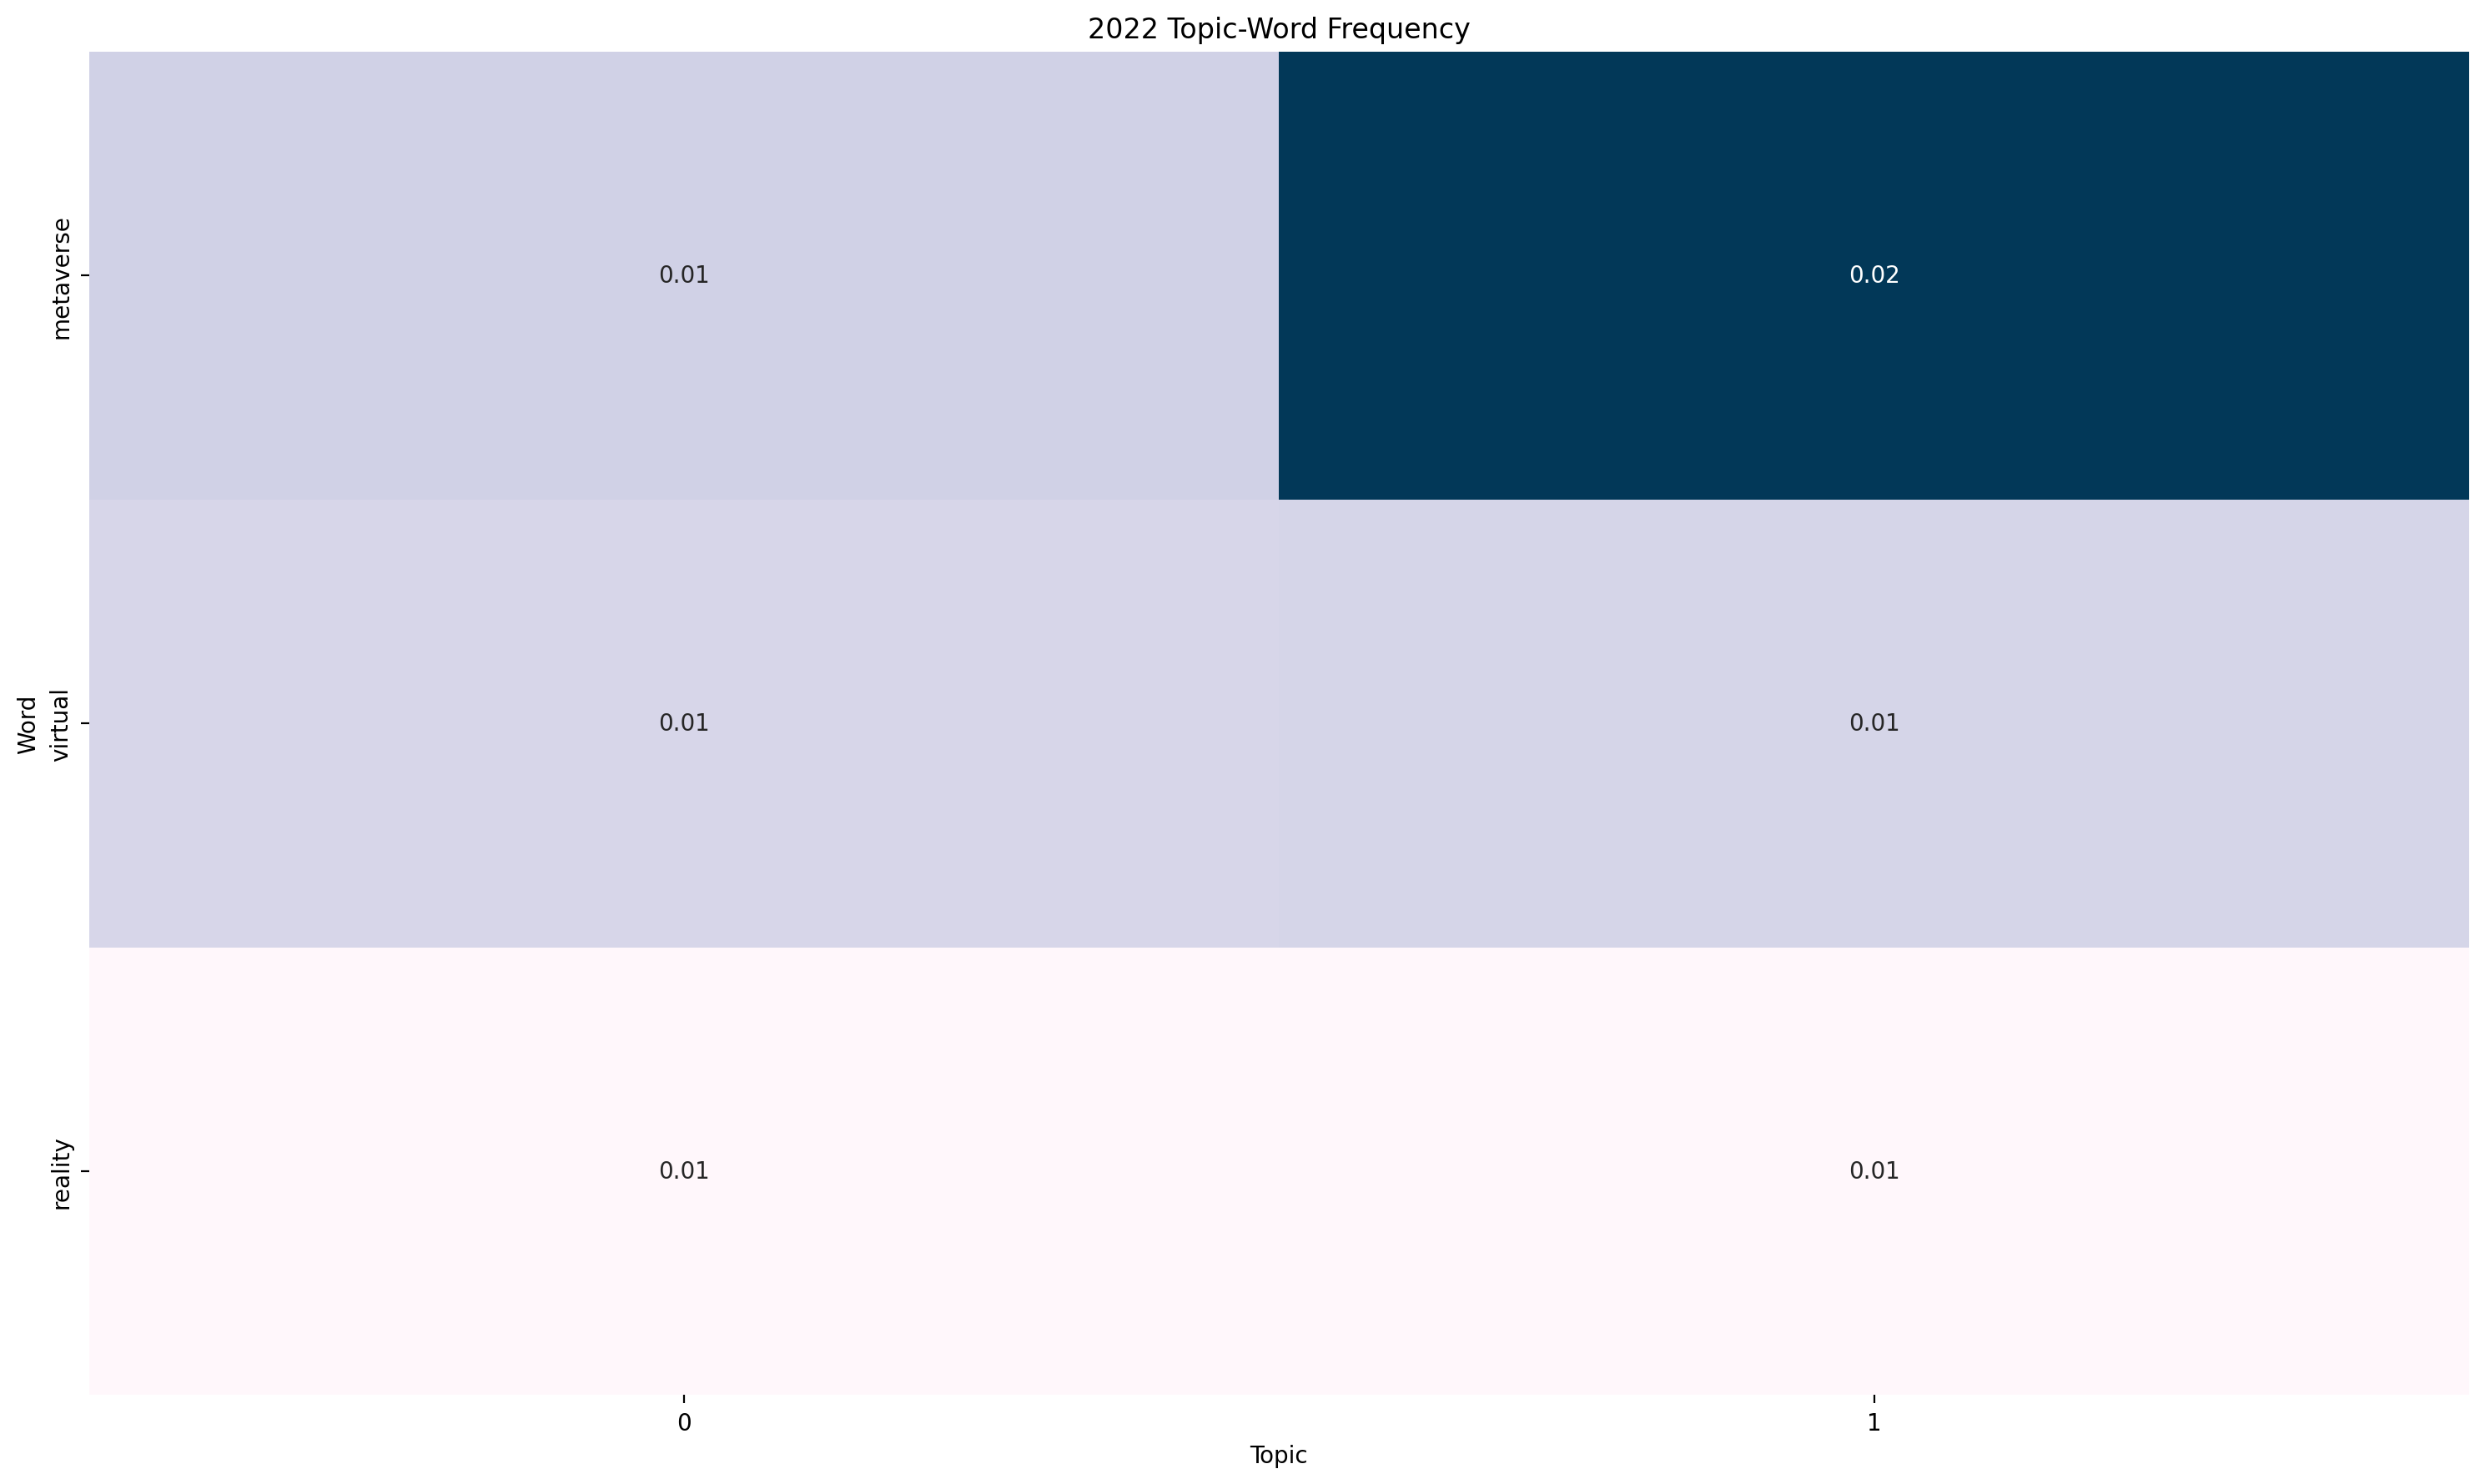

In [23]:
#  텍스트 전처리
stop_words = stopwords.words('english')
texts = data3['Abstract'].dropna().tolist()
texts = [[word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words] for text in texts]

# 사전(dictionary) 구축
dictionary = corpora.Dictionary(texts)

# 문서-단어 행렬(corpus) 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2)

# 토픽별 단어 빈도 표 생성
topic_word_freq = {}
for i in range(lda_model.num_topics):
    topic_word_freq[i] = dict(lda_model.show_topic(i, topn=3))

topic_word_df = pd.DataFrame(topic_word_freq)

# 토픽별 단어 빈도 시각화
plt.figure(figsize=(15, 9), dpi=200)
sns.heatmap(topic_word_df, cmap='PuBu', annot=True, fmt=".2f", cbar=False)
plt.xlabel('Topic')
plt.ylabel('Word')
plt.title('2022 Topic-Word Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 첫/두번째 토픽 : metaverse, virtual, reality [메타버스,가상,현실] => '가상현실 메타버스'

# 3. 2023년

In [17]:
data4 = data[data['Publication Year']==2023]
data4

,Authors,Article Title,Abstract,Publication Year
7,"Gupta, A; Khan, HU; Nazir, S; Shafiq, M; Shaba...","Metaverse Security: Issues, Challenges and a V...",The metaverse is touted as an exciting new tec...,2023.0
10,"Truong, VT; Le, LB; Niyato, D",Blockchain Meets Metaverse and Digital Asset M...,"Envisioned to be the next-generation Internet,...",2023.0
23,"Wang, YT; Su, Z; Zhang, N; Xing, R; Liu, DX; L...","A Survey on Metaverse: Fundamentals, Security,...","Metaverse, as an evolving paradigm of the next...",2023.0
24,"Shao, LJ; Tang, W; Zhang, ZQ; Chen, XR","MEDICAL METAVERSE: TECHNOLOGIES, APPLICATIONS,...","Currently, medical technology is developing ra...",2023.0
25,"Dong, HW; Liu, Y",Metaverse Meets Consumer Electronics,The first year of the Metaverse Era is conside...,2023.0
...,...,...,...,...
502,"Liu, XO; Chen, XY; Bi, Q; Liang, W; Li, JW; Zh...",Blockchain-based distributed operation and inc...,Operators are coming up with new solutions tha...,2023.0
506,"Chen, J; Zhang, L; Lu, Q; Liu, H; Chen, SP",Predicting information usefulness in health in...,Finding useful health information should be th...,2023.0
509,"Kwon, J; Ryu, J; Lee, JH; Joung, J",Improving End-To-End Latency Fairness Using a ...,"In services such as metaverse, which should pr...",2023.0
514,"Kim, C; Cha, HS; Kim, J; Kwak, H; Lee, W; Im, CH",Facial Motion Capture System Based on Facial E...,With the rapid development of virtual reality ...,2023.0


## 2023년 - 토픽 2개, 단어 3개, 토픽별 단어 빈도 시각화

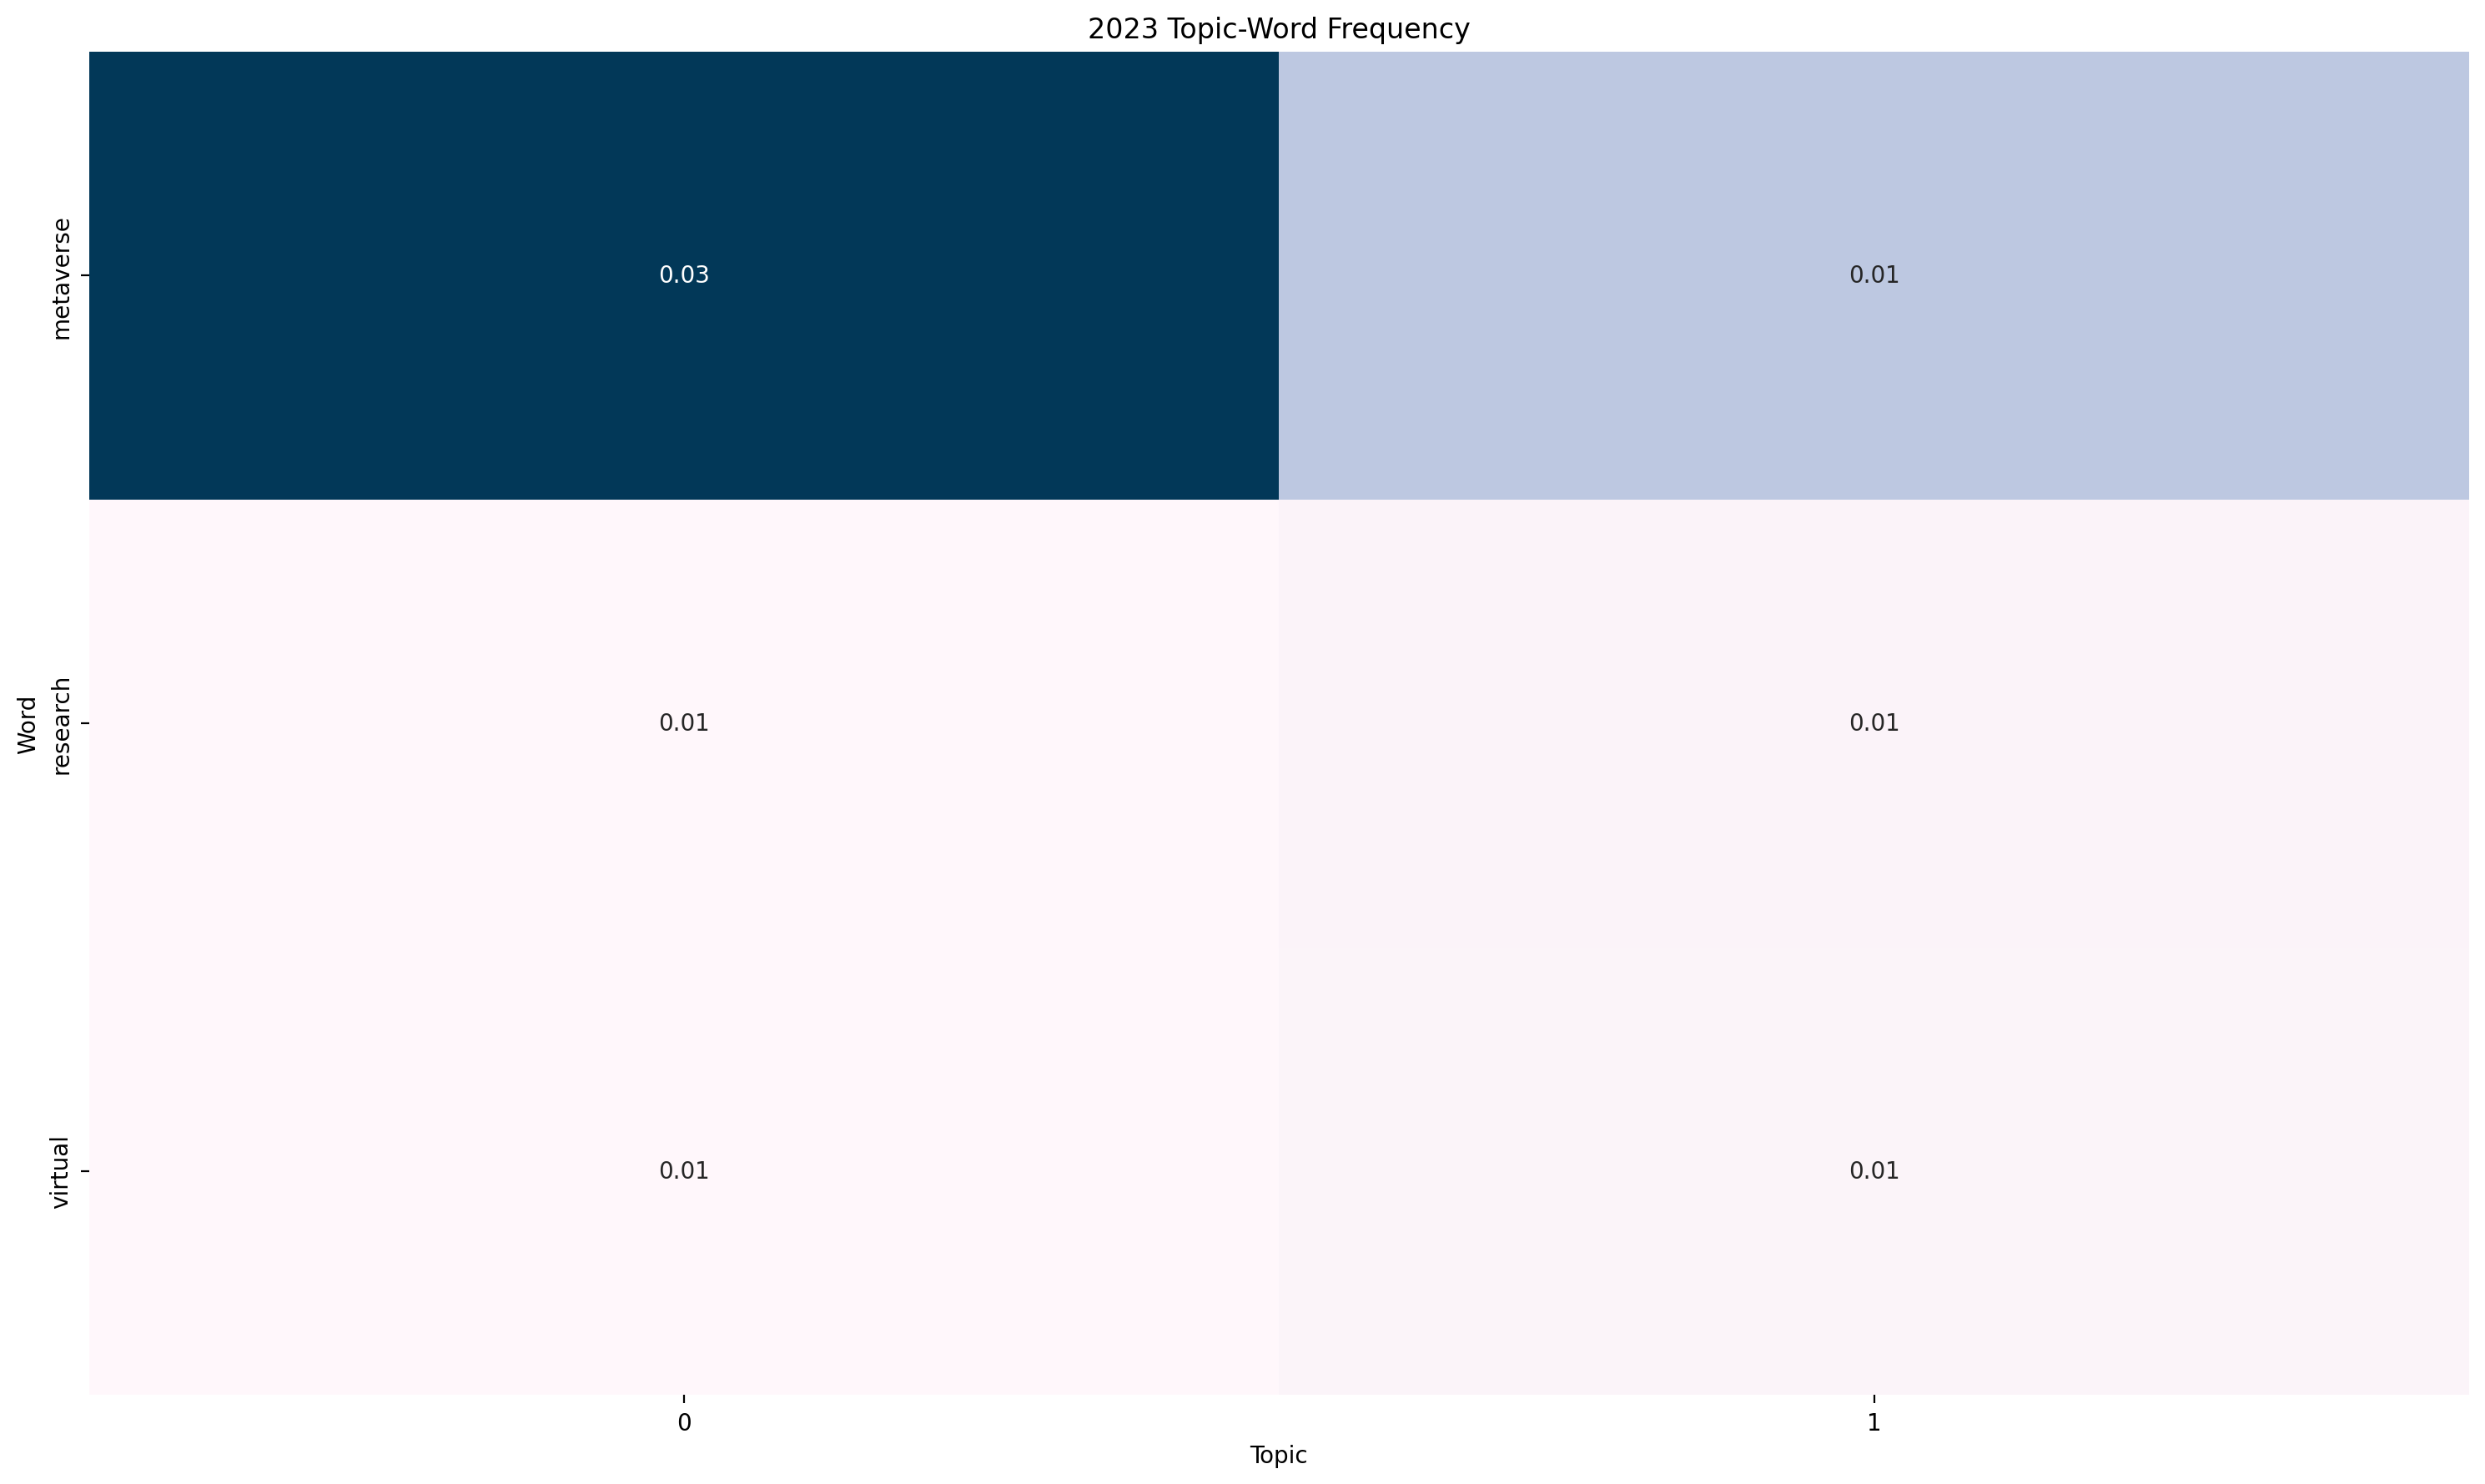

In [24]:
# 텍스트 전처리
stop_words = stopwords.words('english')
texts = data4['Abstract'].dropna().tolist()
texts = [[word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words] for text in texts]

# 사전(dictionary) 구축
dictionary = corpora.Dictionary(texts)

# 문서-단어 행렬(corpus) 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2)

# 토픽별 단어 빈도 표 생성
topic_word_freq = {}
for i in range(lda_model.num_topics):
    topic_word_freq[i] = dict(lda_model.show_topic(i, topn=3))

topic_word_df = pd.DataFrame(topic_word_freq)

# 토픽별 단어 빈도 시각화
plt.figure(figsize=(15, 9), dpi=200)
sns.heatmap(topic_word_df, cmap='PuBu', annot=True, fmt=".2f", cbar=False)
plt.xlabel('Topic')
plt.ylabel('Word')
plt.title('2023 Topic-Word Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 첫/두번째 토픽 : metaverse, research, virtual [메타버스,가상,조사] => '가상의 메타버스에 관한 조사' 도출

2021-2023년 간 메타버스 분야에 관한 주제의 큰 변화는 없었으며, 비슷한 양상임을 확인가능